In [1]:
import geopandas as gpd
#import geojsonio
#import descartes
import matplotlib.pyplot as plt
from random import randint
from shapely.ops import nearest_points


In [3]:
#read GeoJSON data into a DataFrame

District_Boundary_df = gpd.read_file('District_Boundary.geojson')
#type(District_Boundary)
District_Boundary_df.head()

,OBJECTID_1,OBJECTID,Name,area,D_Name,Shape_Leng,area_1,Population,X,Y,Shape_Length,Shape_Area,geometry
0,1,1,????? ?????,781,D 4,14203.805827,7.810276,54076.0,67.0830,36.6987,14203.805827,7.810276e+06,"POLYGON ((67.08671 36.71374, 67.08629 36.71379..."
1,2,2,????? ???,1787,D10,22059.310596,17.870776,74805.0,67.1577,36.6923,22059.310596,1.787078e+07,"POLYGON ((67.14305 36.66304, 67.14350 36.66303..."
2,3,3,????? ???,1039,D 1,19416.391006,10.390477,50007.0,67.1244,36.6730,19416.391006,1.039048e+07,"POLYGON ((67.12092 36.71066, 67.12091 36.71066..."
3,4,4,????? ???,679,D 6,16661.136190,6.786827,42399.0,67.1354,36.6879,16661.136190,6.786827e+06,"POLYGON ((67.14305 36.66304, 67.14308 36.66321..."
4,5,5,????? ????,947,D 7,16541.095321,9.474520,82026.0,67.1432,36.7290,16541.095321,9.474520e+06,"POLYGON ((67.16720 36.72269, 67.16717 36.72280..."


In [4]:
#convert the DataFrame to a geojson object
#District_Boundary = District_Boundary.to_json()
#print(District_Boundary)

In [5]:
#visualize the District_Boundary as a series of Polygons with geojsonio
#geojsonio.display(District_Boundary)

In [6]:
district_Boundary = District_Boundary_df.loc[:, ["OBJECTID", "D_Name", "geometry"]].copy()
district_Boundary.head()

,OBJECTID,D_Name,geometry
0,1,D 4,"POLYGON ((67.08671 36.71374, 67.08629 36.71379..."
1,2,D10,"POLYGON ((67.14305 36.66304, 67.14350 36.66303..."
2,3,D 1,"POLYGON ((67.12092 36.71066, 67.12091 36.71066..."
3,4,D 6,"POLYGON ((67.14305 36.66304, 67.14308 36.66321..."
4,5,D 7,"POLYGON ((67.16720 36.72269, 67.16717 36.72280..."


In [7]:
type(district_Boundary)

geopandas.geodataframe.GeoDataFrame

Text(0.5, 269.07326732244206, 'Longitude')

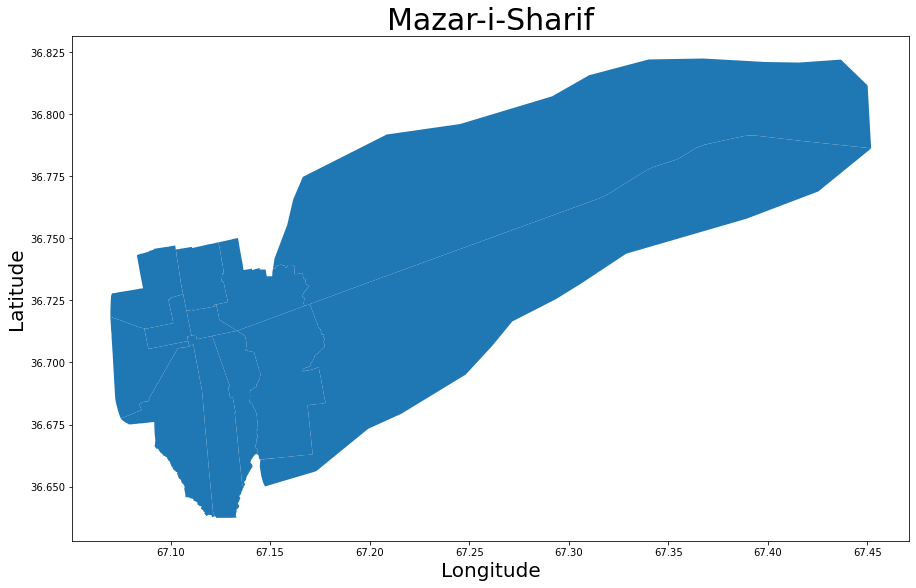

In [8]:
fig, ax = plt.subplots(figsize = (15,15))
district_Boundary.plot(ax=ax)
ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

In [9]:
district_Boundary.loc[:, "Centroid"] = district_Boundary.centroid
district_Boundary.loc[:, "Area"] = district_Boundary.geometry.area / 10**6

print("Area of Mazar-i-Sharif: {} square kilometers".format(district_Boundary.Area.sum()))
print("CRS:", district_Boundary.crs)
district_Boundary.head()

Area of Mazar-i-Sharif: 3.2036371602764936e-08 square kilometers
CRS: epsg:4326


<ipython-input-9-a1bc715d29a4>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  district_Boundary.loc[:, "Centroid"] = district_Boundary.centroid
<ipython-input-9-a1bc715d29a4>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  district_Boundary.loc[:, "Area"] = district_Boundary.geometry.area / 10**6


,OBJECTID,D_Name,geometry,Centroid,Area
0,1,D 4,"POLYGON ((67.08671 36.71374, 67.08629 36.71379...",POINT (67.08299 36.69867),7.876539e-10
1,2,D10,"POLYGON ((67.14305 36.66304, 67.14350 36.66303...",POINT (67.15773 36.69228),1.802191e-09
2,3,D 1,"POLYGON ((67.12092 36.71066, 67.12091 36.71066...",POINT (67.12436 36.67303),1.047551e-09
3,4,D 6,"POLYGON ((67.14305 36.66304, 67.14308 36.66321...",POINT (67.13540 36.68792),6.843730e-10
4,5,D 7,"POLYGON ((67.16720 36.72269, 67.16717 36.72280...",POINT (67.14318 36.72903),9.559044e-10


<ipython-input-10-7305a9d7a450>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  district_Boundary.centroid.plot(color = 'yellow', ax=ax)


Text(0.5, 269.0817668472561, 'Longitude')

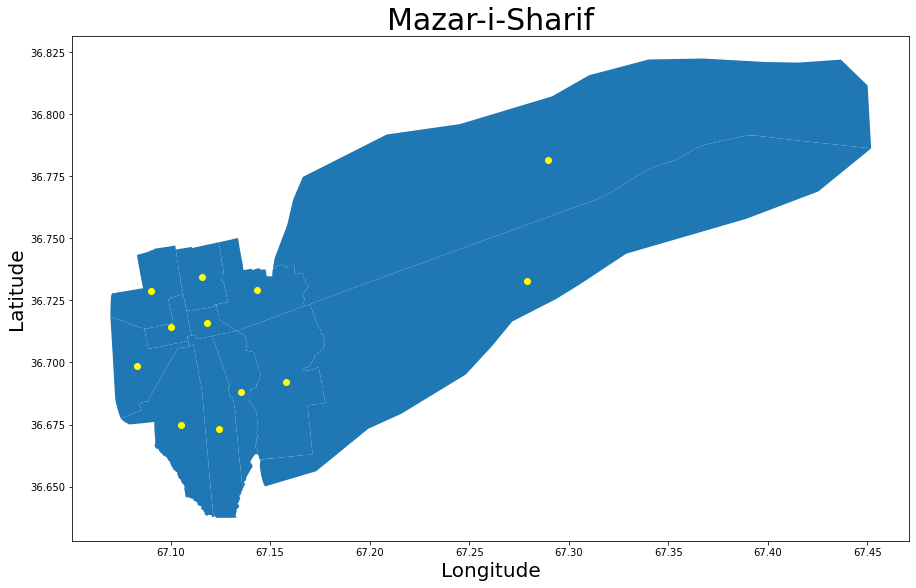

In [10]:
fig, ax = plt.subplots(figsize = (15,15))
district_Boundary.plot(ax=ax)
district_Boundary.centroid.plot(color = 'yellow', ax=ax)
ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

Kruskal find distances:

In [11]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [12]:

# Python program for Kruskal's algorithm to find
# Minimum Spanning Tree of a given connected,
# undirected and weighted graph
 
from collections import defaultdict
 
# Class to represent a graph
 
 
class Graph:
 
    def __init__(self, vertices):
        self.V = vertices  # No. of vertices
        self.graph = []  # default dictionary
        self.result = []
        # to store graph
 
    # function to add an edge to graph
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
 
    # A utility function to find set of an element i
    # (uses path compression technique)
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])
 
    # A function that does union of two sets of x and y
    # (uses union by rank)
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
 
        # Attach smaller rank tree under root of
        # high rank tree (Union by Rank)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
 
        # If ranks are same, then make one as root
        # and increment its rank by one
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
 
    # The main function to construct MST using Kruskal's
        # algorithm
    def KruskalMST(self):
 
        self.result = []  # This will store the resultant MST
         
        # An index variable, used for sorted edges
        i = 0
         
        # An index variable, used for result[]
        e = 0
 
        # Step 1:  Sort all the edges in 
        # non-decreasing order of their
        # weight.  If we are not allowed to change the
        # given graph, we can create a copy of graph
        self.graph = sorted(self.graph, 
                            key=lambda item: item[2])
 
        parent = []
        rank = []
 
        # Create V subsets with single elements
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
 
        # Number of edges to be taken is equal to V-1
        while e < self.V - 1:
 
            # Step 2: Pick the smallest edge and increment
            # the index for next iteration
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
 
            # If including this edge does't
            #  cause cycle, include it in result 
            #  and increment the indexof result 
            # for next edge
            if x != y:
                e = e + 1
                self.result.append([u, v, w])
                self.union(parent, rank, x, y)
            # Else discard the edge
 
        minimumCost = 0
        print("Edges in the constructed MST")
        for u, v, weight in self.result:
            minimumCost += weight
            print("%d -- %d == %f" % (u, v, weight))
        print("Minimum Spanning Tree" , minimumCost)
 
# Driver code


In [13]:
import math

edges = []
calced_edges = []

for i in range(len(district_Boundary.centroid)):
    for j in range(len(district_Boundary.centroid)):
        if (not((i,j) in calced_edges) and not((j,i) in calced_edges) and (i != j)):
            calced_edges.append((i,j))
            dist = math.sqrt((district_Boundary.centroid[i].x - district_Boundary.centroid[j].x)**2 + (district_Boundary.centroid[i].y - district_Boundary.centroid[j].y)**2) 
            edges.append([i,j, dist])

In [14]:
#edges

g = Graph(len(district_Boundary.centroid))
for e in edges:
    g.addEdge(e[0], e[1], e[2])

g.KruskalMST()

g.result

Edges in the constructed MST
8 -- 9 == 0.017650
6 -- 9 == 0.018113
2 -- 3 == 0.018538
5 -- 6 == 0.018946
2 -- 7 == 0.019207
1 -- 3 == 0.022755
0 -- 9 == 0.023355
4 -- 5 == 0.028096
0 -- 7 == 0.032660
10 -- 11 == 0.049942
1 -- 11 == 0.127844
Minimum Spanning Tree 0.377106518801251


[[8, 9, 0.017649987250269773],
 [6, 9, 0.018113307190870696],
 [2, 3, 0.01853807799782334],
 [5, 6, 0.018946055440479528],
 [2, 7, 0.01920724240047876],
 [1, 3, 0.022754934893750762],
 [0, 9, 0.02335486835685102],
 [4, 5, 0.028095514243699642],
 [0, 7, 0.03266044034781767],
 [10, 11, 0.049941770187987886],
 [1, 11, 0.12784432049122196]]

Text(0.5, 319.22884360284377, 'Longitude')

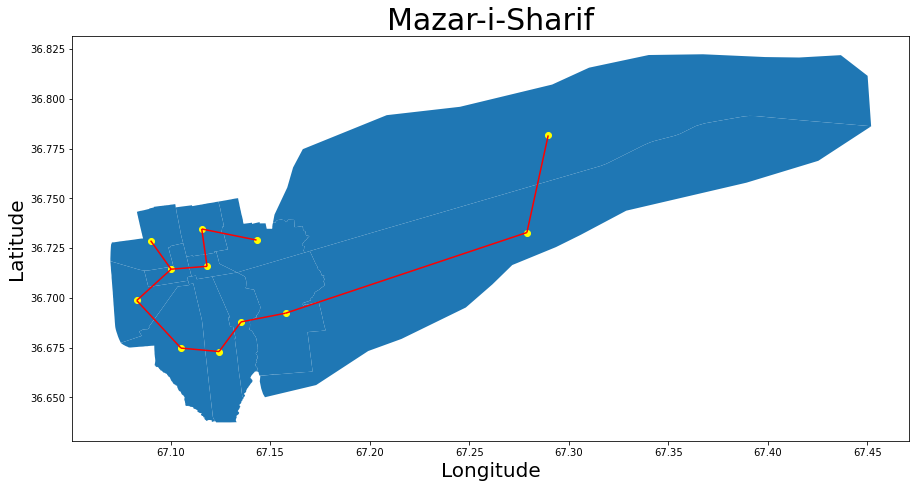

In [15]:
fig, ax = plt.subplots(figsize = (15,15))
district_Boundary.plot(ax=ax)
district_Boundary.centroid.plot(color = 'yellow', ax=ax)


from shapely.geometry import LineString

lines = []
for e in g.result:
    l = LineString([district_Boundary.centroid[e[0]],district_Boundary.centroid[e[1]]])
    lines.append(l)
    
s = gpd.GeoSeries(lines)
s.plot(ax=ax, color='red')


ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

In [19]:
Gozar_Boundary_df = gpd.read_file('Gozar_Boundary.geojson')
Gozar_Boundary_df.head()

,OBJECTID_1,OBJECTID,Name,area,D_Name,Shape_Leng,area_1,Shape_Length,Shape_Area,geometry
0,1,1,08,781,D 4,14203.805827,7.810276,5981.302061,1.831722e+06,"POLYGON ((67.07186 36.68994, 67.07186 36.68991..."
1,2,2,24,1787,D 10,22059.310596,17.870776,3980.992729,7.759856e+05,"POLYGON ((67.15599 36.67144, 67.15585 36.67272..."
2,3,3,12,1039,D 1,19416.391006,10.390477,3824.092744,6.830197e+05,"POLYGON ((67.13445 36.64220, 67.13441 36.64235..."
3,4,4,08,679,D 6,16661.136190,6.786827,5268.445794,1.070052e+06,"POLYGON ((67.13341 36.66749, 67.13369 36.66472..."
4,5,5,01,947,D 7,16541.095321,9.474520,3933.616562,8.012730e+05,"POLYGON ((67.14091 36.71496, 67.14064 36.71587..."


In [20]:
Gozar_Boundary = Gozar_Boundary_df.loc[:, ["OBJECTID", "D_Name", "geometry"]].copy()
Gozar_Boundary.head()

,OBJECTID,D_Name,geometry
0,1,D 4,"POLYGON ((67.07186 36.68994, 67.07186 36.68991..."
1,2,D 10,"POLYGON ((67.15599 36.67144, 67.15585 36.67272..."
2,3,D 1,"POLYGON ((67.13445 36.64220, 67.13441 36.64235..."
3,4,D 6,"POLYGON ((67.13341 36.66749, 67.13369 36.66472..."
4,5,D 7,"POLYGON ((67.14091 36.71496, 67.14064 36.71587..."


Text(0.5, 114.0, 'Longitude')

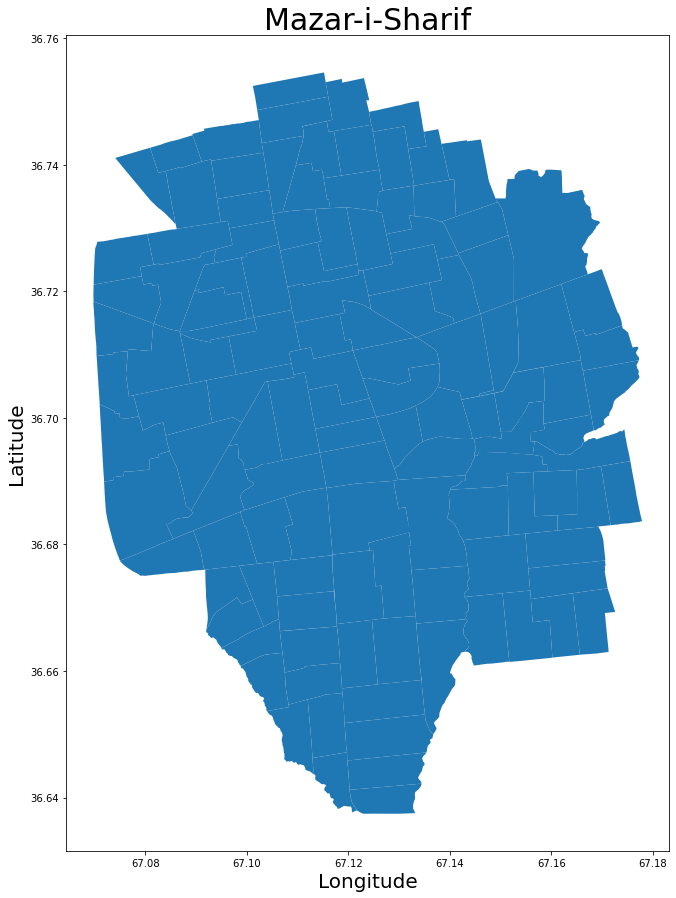

In [21]:
fig, ax = plt.subplots(figsize = (15,15))
Gozar_Boundary.plot(ax=ax)
ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

In [22]:
Gozar_Boundary.loc[:, "Centroid"] = Gozar_Boundary.centroid
Gozar_Boundary.loc[:, "Area"] = Gozar_Boundary.geometry.area / 10**6

print("Area of Mazar-i-Sharif: {} square kilometers".format(district_Boundary.Area.sum()))
print("CRS:", Gozar_Boundary.crs)
Gozar_Boundary.head()

Area of Mazar-i-Sharif: 3.2036371602764936e-08 square kilometers
CRS: epsg:4326


,OBJECTID,D_Name,geometry,Centroid,Area
0,1,D 4,"POLYGON ((67.07186 36.68994, 67.07186 36.68991...",POINT (67.07987 36.68603),1.846956e-10
1,2,D 10,"POLYGON ((67.15599 36.67144, 67.15585 36.67272...",POINT (67.15489 36.66656),7.822936e-11
2,3,D 1,"POLYGON ((67.13445 36.64220, 67.13441 36.64235...",POINT (67.12734 36.64413),6.883653e-11
3,4,D 6,"POLYGON ((67.13341 36.66749, 67.13369 36.66472...",POINT (67.13786 36.66129),1.078647e-10
4,5,D 7,"POLYGON ((67.14091 36.71496, 67.14064 36.71587...",POINT (67.13231 36.71710),8.082769e-11


Text(0.5, 114.0, 'Longitude')

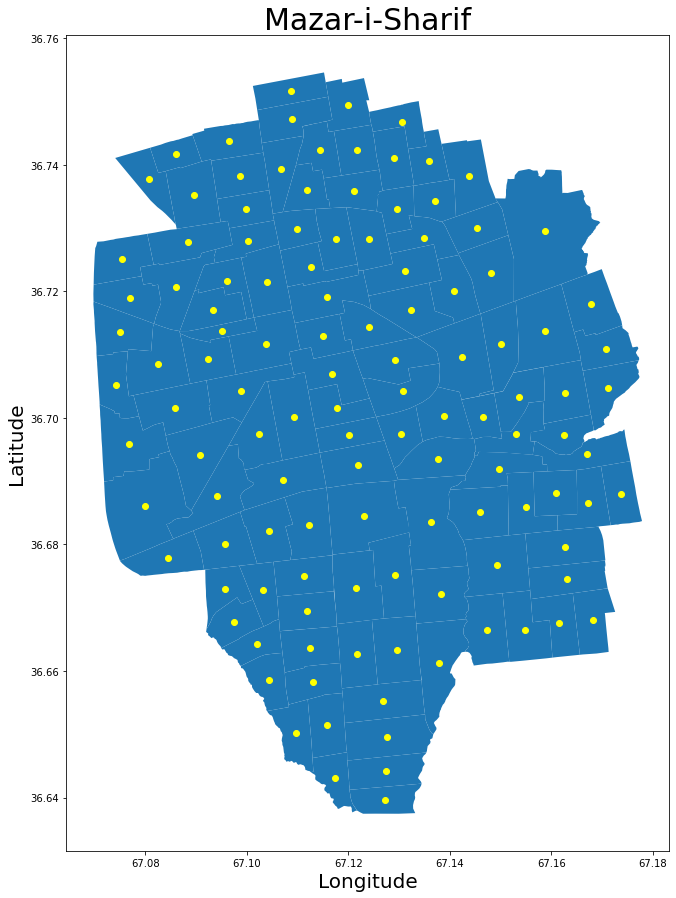

In [23]:
fig, ax = plt.subplots(figsize = (15,15))
Gozar_Boundary.plot(ax=ax)
Gozar_Boundary.centroid.plot(color = 'yellow', ax=ax)
ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

In [24]:
num_garage = 4

In [25]:
garage_loc_index = [randint(0, len(Gozar_Boundary)) for p in range(0, num_garage)]
print (garage_loc_index)

[3, 55, 40, 29]


In [26]:
Garage_locations = Gozar_Boundary.loc[garage_loc_index,["D_Name", "geometry", "Centroid"]].copy()
Garage_locations=Garage_locations.rename(columns={"Centroid": "Location"})

In [27]:
Garage_locations

,D_Name,geometry,Location
3,D 6,"POLYGON ((67.13341 36.66749, 67.13369 36.66472...",POINT (67.13786 36.66129)
55,D 9,"POLYGON ((67.09413 36.73461, 67.09413 36.73461...",POINT (67.08953 36.73522)
40,D 7,"POLYGON ((67.14091 36.71496, 67.14297 36.71555...",POINT (67.14094 36.72010)
29,D 10,"POLYGON ((67.15174 36.66146, 67.15041 36.67229...",POINT (67.14728 36.66653)


Text(0.5, 114.0, 'Longitude')

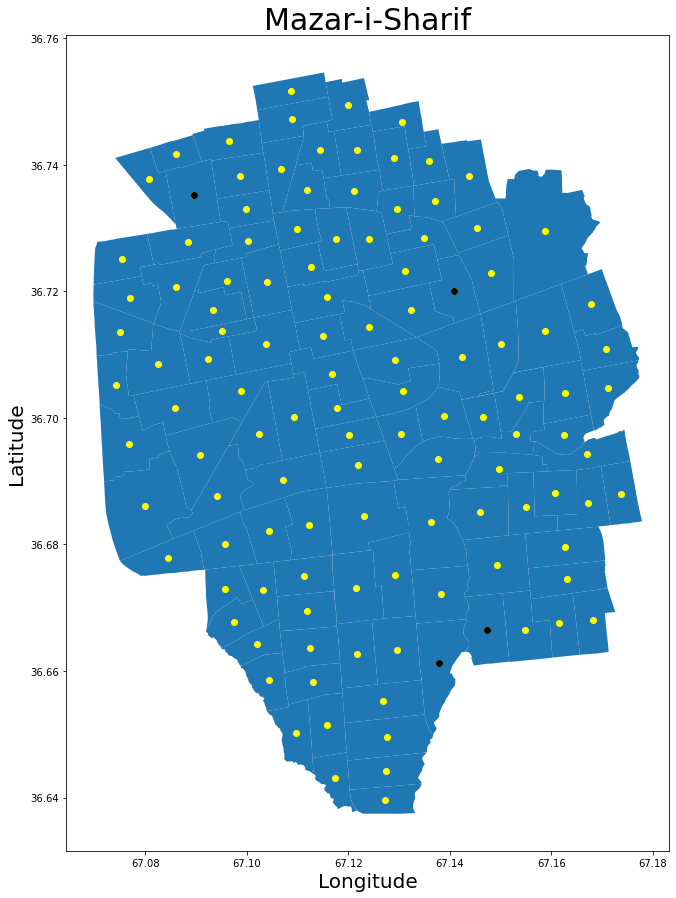

In [28]:
fig, ax = plt.subplots(figsize = (15,15))
Gozar_Boundary.plot(ax=ax)
Gozar_Boundary.centroid.plot(color = 'yellow', ax=ax)
Garage_locations.centroid.plot(color = 'black', ax=ax)
ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

In [29]:
Garage_location_pts= Garage_locations.centroid.unary_union
def nearest_Garage(point, pts= Garage_location_pts):
    nearest = nearest_points(point, pts)[1]
    return [Garage_locations.iloc[x].D_Name for x in range(num_garage) if Garage_locations.iloc[x].Location == nearest][0]




In [30]:
Gozar_Boundary['Nearest_Garage'] = Gozar_Boundary.apply(lambda row: nearest_Garage(row.Centroid), axis=1)

In [31]:
Gozar_Boundary.head()

,OBJECTID,D_Name,geometry,Centroid,Area,Nearest_Garage
0,1,D 4,"POLYGON ((67.07186 36.68994, 67.07186 36.68991...",POINT (67.07987 36.68603),1.846956e-10,D 9
1,2,D 10,"POLYGON ((67.15599 36.67144, 67.15585 36.67272...",POINT (67.15489 36.66656),7.822936e-11,D 10
2,3,D 1,"POLYGON ((67.13445 36.64220, 67.13441 36.64235...",POINT (67.12734 36.64413),6.883653e-11,D 6
3,4,D 6,"POLYGON ((67.13341 36.66749, 67.13369 36.66472...",POINT (67.13786 36.66129),1.078647e-10,D 6
4,5,D 7,"POLYGON ((67.14091 36.71496, 67.14064 36.71587...",POINT (67.13231 36.71710),8.082769e-11,D 7


In [33]:
Disposal_Location_df = gpd.read_file('Disposal_Location.geojson')
#type(District_Boundary)
Disposal_Location_df.head()

,OBJECTID,X,Y,Pl_Name,geometry
0,1,67.096813,36.751537,Dasht Shor Disposal Site,POINT (67.09681 36.75154)
1,2,67.044086,36.672592,Dehdaadi Disposal Site,POINT (67.04409 36.67259)
2,3,67.208801,36.683606,Back side of German Comp and airport Site,POINT (67.20880 36.68361)
3,4,67.241168,36.724246,Gore Mar Disposal Site,POINT (67.24117 36.72425)


In [34]:
Disposal_Location = Disposal_Location_df.loc[:, ["OBJECTID", "geometry"]].copy()
Disposal_Location['Name'] = Disposal_Location.apply(lambda row: "Disposal_Loc" + str(row.OBJECTID), axis=1)
Disposal_Location.head()

,OBJECTID,geometry,Name
0,1,POINT (67.09681 36.75154),Disposal_Loc1
1,2,POINT (67.04409 36.67259),Disposal_Loc2
2,3,POINT (67.20880 36.68361),Disposal_Loc3
3,4,POINT (67.24117 36.72425),Disposal_Loc4


In [35]:
Disposal_Location_pts = Disposal_Location.geometry.unary_union
def nearest_Disposal(point, pts= Disposal_Location_pts):
    nearest = nearest_points(point, pts)[1]
    return [Disposal_Location.iloc[x].Name for x in range(len(Disposal_Location)) if Disposal_Location.iloc[x].geometry == nearest][0]


In [36]:

Garage_locations['Nearest_Disposal'] = Garage_locations.apply(lambda row: nearest_Disposal(row.Location), axis=1)

In [37]:
Garage_locations

,D_Name,geometry,Location,Nearest_Disposal
3,D 6,"POLYGON ((67.13341 36.66749, 67.13369 36.66472...",POINT (67.13786 36.66129),Disposal_Loc3
55,D 9,"POLYGON ((67.09413 36.73461, 67.09413 36.73461...",POINT (67.08953 36.73522),Disposal_Loc1
40,D 7,"POLYGON ((67.14091 36.71496, 67.14297 36.71555...",POINT (67.14094 36.72010),Disposal_Loc1
29,D 10,"POLYGON ((67.15174 36.66146, 67.15041 36.67229...",POINT (67.14728 36.66653),Disposal_Loc3


In [38]:
edges = []
calced_edges = []

for i in range(len(Gozar_Boundary.centroid)):
    for j in range(len(Gozar_Boundary.centroid)):
        if (not((i,j) in calced_edges) and not((j,i) in calced_edges) and (i != j)):
            calced_edges.append((i,j))
            dist = math.sqrt((Gozar_Boundary.centroid[i].x - Gozar_Boundary.centroid[j].x)**2 + (Gozar_Boundary.centroid[i].y - Gozar_Boundary.centroid[j].y)**2) 
            edges.append([i,j, dist])

In [39]:
#edges

g = Graph(len(Gozar_Boundary.centroid))
for e in edges:
    g.addEdge(e[0], e[1], e[2])

g.KruskalMST()

g.result

Edges in the constructed MST
7 -- 62 == 0.003732
48 -- 114 == 0.004384
2 -- 101 == 0.004451
91 -- 92 == 0.004890
54 -- 57 == 0.005022
26 -- 27 == 0.005052
102 -- 103 == 0.005122
92 -- 93 == 0.005124
7 -- 115 == 0.005249
62 -- 63 == 0.005290
2 -- 100 == 0.005374
53 -- 54 == 0.005443
16 -- 21 == 0.005490
86 -- 87 == 0.005503
90 -- 91 == 0.005548
83 -- 117 == 0.005586
82 -- 83 == 0.005588
79 -- 80 == 0.005593
59 -- 64 == 0.005686
99 -- 100 == 0.005757
80 -- 87 == 0.005787
42 -- 112 == 0.005840
51 -- 53 == 0.005844
33 -- 34 == 0.005929
17 -- 18 == 0.005962
90 -- 113 == 0.006081
46 -- 47 == 0.006132
84 -- 117 == 0.006173
112 -- 113 == 0.006214
4 -- 38 == 0.006225
13 -- 14 == 0.006265
23 -- 24 == 0.006278
37 -- 110 == 0.006324
58 -- 59 == 0.006375
41 -- 46 == 0.006381
5 -- 45 == 0.006383
85 -- 89 == 0.006392
109 -- 110 == 0.006408
37 -- 38 == 0.006476
17 -- 20 == 0.006483
52 -- 116 == 0.006577
23 -- 25 == 0.006586
42 -- 44 == 0.006587
22 -- 25 == 0.006636
15 -- 16 == 0.006652
41 -- 42 == 0.0

[[7, 62, 0.00373186315798097],
 [48, 114, 0.004383894975308286],
 [2, 101, 0.004450760033513387],
 [91, 92, 0.004890107268524763],
 [54, 57, 0.005022212385710394],
 [26, 27, 0.00505216900167911],
 [102, 103, 0.0051215514213264635],
 [92, 93, 0.005123570663284876],
 [7, 115, 0.005248741582907734],
 [62, 63, 0.005290372382961803],
 [2, 100, 0.005373689879807208],
 [53, 54, 0.005442768788797841],
 [16, 21, 0.005489787044182099],
 [86, 87, 0.005502528096095069],
 [90, 91, 0.005548336309022339],
 [83, 117, 0.005585582938845824],
 [82, 83, 0.005588029126447122],
 [79, 80, 0.005592595153185204],
 [59, 64, 0.005685678222010746],
 [99, 100, 0.005757485106609696],
 [80, 87, 0.005787077854044716],
 [42, 112, 0.00583956506421466],
 [51, 53, 0.00584375275717767],
 [33, 34, 0.005928658472259424],
 [17, 18, 0.00596239824611766],
 [90, 113, 0.006080841505508158],
 [46, 47, 0.006131936346123406],
 [84, 117, 0.0061733582844444666],
 [112, 113, 0.006214020330990586],
 [4, 38, 0.006224504503246405],
 [13,

Text(0.5, 114.0, 'Longitude')

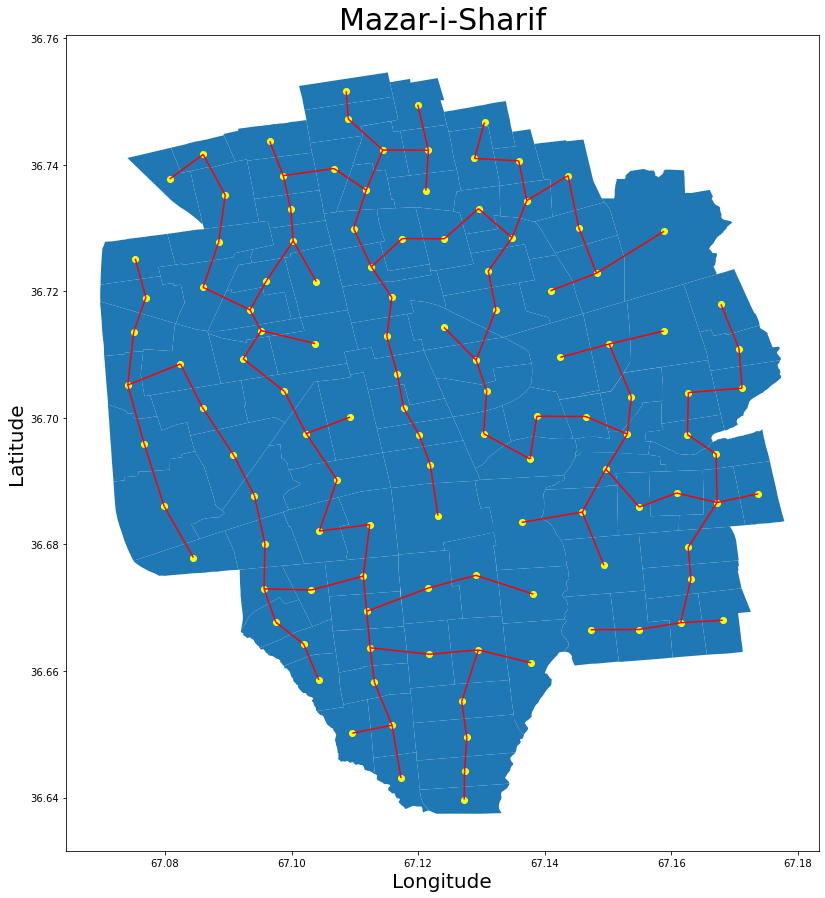

In [41]:
fig, ax = plt.subplots(figsize = (15,15))
Gozar_Boundary.plot(ax=ax)
Gozar_Boundary.centroid.plot(color = 'yellow', ax=ax)


from shapely.geometry import LineString

lines = []
for e in g.result:
    l = LineString([Gozar_Boundary.centroid[e[0]],Gozar_Boundary.centroid[e[1]]])
    lines.append(l)
    
s = gpd.GeoSeries(lines)
s.plot(ax=ax, color='red')


ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})